In [68]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scrublet as scr
import celltypist
from celltypist import models
import decoupler as dc
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=150)

# Import raw files

In [69]:
inpath="/home/lugli/spuccio/Projects/SP039/FileH5AD_input/"

In [70]:
adataND1 = sc.read(inpath+"ND1.h5ad")
adataND2 = sc.read(inpath+"ND2.h5ad")
adataND3 = sc.read(inpath+"ND3.h5ad")
adataND4 = sc.read(inpath+"ND4.h5ad")
adataND5 = sc.read(inpath+"ND5.h5ad")
adataND5 = sc.read(inpath+"ND6.h5ad")

# Read Metadata

In [71]:
metadata = pd.read_excel('Metadata2.xlsx')

In [72]:
metadata.head(50)

SampleID       GEO_RNA           Cohort          Type  \
0              PJ048    GSM2940098        GSE103224  PrimaryTumor   
1              PJ030    GSM2758475        GSE103224  PrimaryTumor   
2              PJ025    GSM2758474        GSE103224  PrimaryTumor   
3              PJ018    GSM2758473        GSE103224  PrimaryTumor   
4              PJ017    GSM2758472        GSE103224  PrimaryTumor   
5              PJ016    GSM2758472        GSE103224  PrimaryTumor   
6             MGH102  NotAvailable        GSE131928  PrimaryTumor   
7             MGH105  NotAvailable        GSE131928  PrimaryTumor   
8             MGH115  NotAvailable        GSE131928  PrimaryTumor   
9             MGH124  NotAvailable        GSE131928  PrimaryTumor   
10            MGH125  NotAvailable        GSE131928  PrimaryTumor   
11            MGH126  NotAvailable        GSE131928  PrimaryTumor   
12               ND1  NotAvailable        GSE163120  PrimaryTumor   
13               ND2  NotAvailable        GSE163120  PrimaryTumor   
14               ND3  NotAvailable        GSE163120  PrimaryTumor   
15               ND4  NotAvailable        GSE163120  PrimaryTumor   
16               ND5  NotAvailable        GSE163120  PrimaryTumor   
17               ND6  NotAvailable        GSE163120  PrimaryTumor   
18              NS02    GSM3827162        GSE131907    Metastasis   
19              NS03    GSM3827163        GSE131907    Metastasis   
20              NS04    GSM3827164        GSE131907    Metastasis   
21              NS06    GSM3827165        GSE131907    Metastasis   
22              NS07    GSM3827166        GSE131907    Metastasis   
23              NS12    GSM3827167        GSE131907    Metastasis   
24              NS13    GSM3827168        GSE131907    Metastasis   
25              NS16    GSM3827169        GSE131907    Metastasis   
26              NS17    GSM3827170        GSE131907    Metastasis   
27              NS19    GSM3827171        GSE131907    Metastasis   
28           GLIO1_T  NotAvailable  InternalCohort2  PrimaryTumor   
29           GLIO2_T  NotAvailable  InternalCohort2  PrimaryTumor   
30           GLIO3_T  NotAvailable  InternalCohort2  PrimaryTumor   
31           GLIO4_T  NotAvailable  InternalCohort2  PrimaryTumor   
32           GLIO5_T  NotAvailable  InternalCohort2  PrimaryTumor   
33           GLIO6_T  NotAvailable  InternalCohort2  PrimaryTumor   
34           GLIO7_T  NotAvailable  InternalCohort2  PrimaryTumor   
35         Ovarian_2    GSM5645898        GSE186344    Metastasis   
36          Breast_2    GSM5645892        GSE186344    Metastasis   
37           Melan_3    GSM5645890        GSE186344    Metastasis   
38            Lung_1    GSM5645894        GSE186344    Metastasis   
39            Lung_2    GSM5645895        GSE186344    Metastasis   
40            Lung_3    GSM5645896        GSE186344    Metastasis   
41        Renal_Cell    GSM5645902        GSE186344    Metastasis   
42         Ovarian_1    GSM5645897        GSE186344    Metastasis   
43        Colorectal    GSM5645900        GSE186344    Metastasis   
44           Melan_2    GSM5645889        GSE186344    Metastasis   
45           Melan_1    GSM5645888        GSE186344    Metastasis   
46  KSO07_BRM112_GEX  NotAvailable  InternalCohort1    Metastasis   
47  KSO07_BRM125_GEX  NotAvailable  InternalCohort1    Metastasis   
48  KSO07_BrM138_GEX  NotAvailable  InternalCohort1    Metastasis   
49  KSO07_BRM139_GEX  NotAvailable  InternalCohort1    Metastasis   

         Subtype               Diagnosis         Grade              Location  \
0      Proneural            Glioblastoma            IV        Right_Parietal   
1      Classical  Anaplastic_Astrocytoma           III         Left_Temporal   
2      Classical            Glioblastoma            IV         Right_Frontal   
3      Proneural            Glioblastoma            IV         Left_Temporal   
4    Mesenchymal            Glioblastoma            IV         Left_Temporal   
5      Prone

# Fix Metadata 

In [73]:
tmp1 = metadata.loc[metadata['SampleID'] == "ND1"].loc[metadata.loc[metadata['SampleID'] == "ND1"].index.repeat(adataND1.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "ND1-" + tmp1.index.astype(str),inplace=True) 
adataND1.obs = tmp1

In [74]:
tmp1 = metadata.loc[metadata['SampleID'] == "ND2"].loc[metadata.loc[metadata['SampleID'] == "ND2"].index.repeat(adataND2.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "ND2-" + tmp1.index.astype(str),inplace=True) 
adataND2.obs = tmp1

In [75]:
tmp1 = metadata.loc[metadata['SampleID'] == "ND3"].loc[metadata.loc[metadata['SampleID'] == "ND3"].index.repeat(adataND3.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "ND3-" + tmp1.index.astype(str),inplace=True) 
adataND3.obs = tmp1

In [76]:
tmp1 = metadata.loc[metadata['SampleID'] == "ND4"].loc[metadata.loc[metadata['SampleID'] == "ND4"].index.repeat(adataND4.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "ND4-" + tmp1.index.astype(str),inplace=True) 
adataND4.obs = tmp1

In [77]:
tmp1 = metadata.loc[metadata['SampleID'] == "ND5"].loc[metadata.loc[metadata['SampleID'] == "ND5"].index.repeat(adataND5.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "ND5-" + tmp1.index.astype(str),inplace=True) 
adataND5.obs = tmp1

# Concatenate 

In [78]:
adata = adataND1.concatenate(adataND2,adataND3, adataND4, adataND5,index_unique=None)

In [79]:
del(adataND1, adataND2,adataND3, adataND4, adataND5)

In [80]:
print(adata.obs['SampleID'].value_counts())
adata

ND4    3607
ND2    1761
ND5    1719
ND1     718
ND3     350
Name: SampleID, dtype: int64


AnnData object with n_obs × n_vars = 8155 × 33694
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch'
    var: 'gene_ids'

In [81]:
adata.layers['raw'] = adata.X 

# Calculate QC

In [82]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

In [83]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [84]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [85]:
adata

AnnData object with n_obs × n_vars = 8155 × 33694
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw'

# Plot QC

... storing 'SampleID' as categorical
... storing 'GEO_RNA' as categorical
... storing 'Cohort' as categorical
... storing 'Type' as categorical
... storing 'Subtype' as categorical
... storing 'Diagnosis' as categorical
... storing 'Grade' as categorical
... storing 'Location' as categorical
... storing 'IDH1_Status' as categorical
... storing 'EGFR_Status' as categorical
... storing 'MGMT' as categorical
... storing 'Sex' as categorical
... storing 'Age' as categorical
... storing 'Sorted' as categorical
... storing 'MET' as categorical


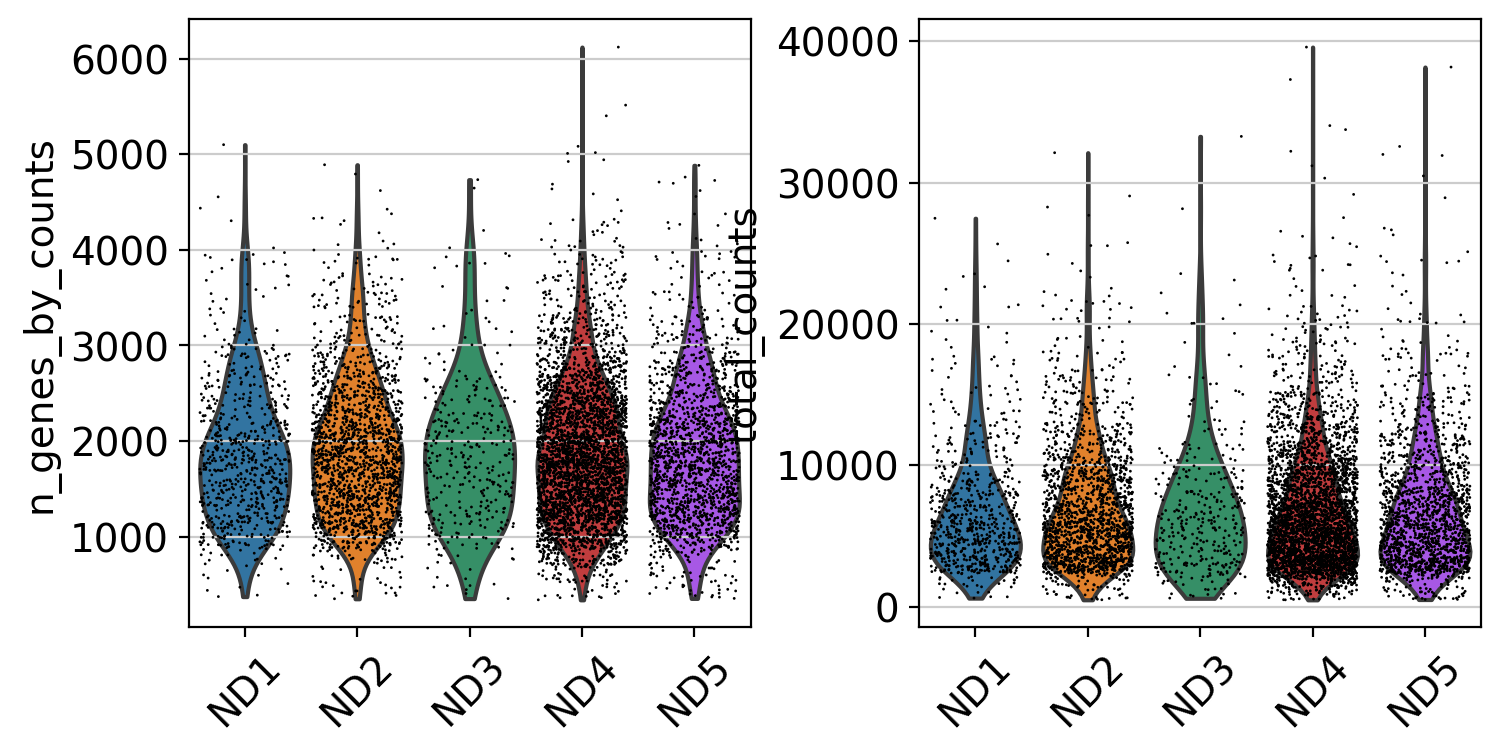

In [86]:
sc.set_figure_params(dpi=100)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

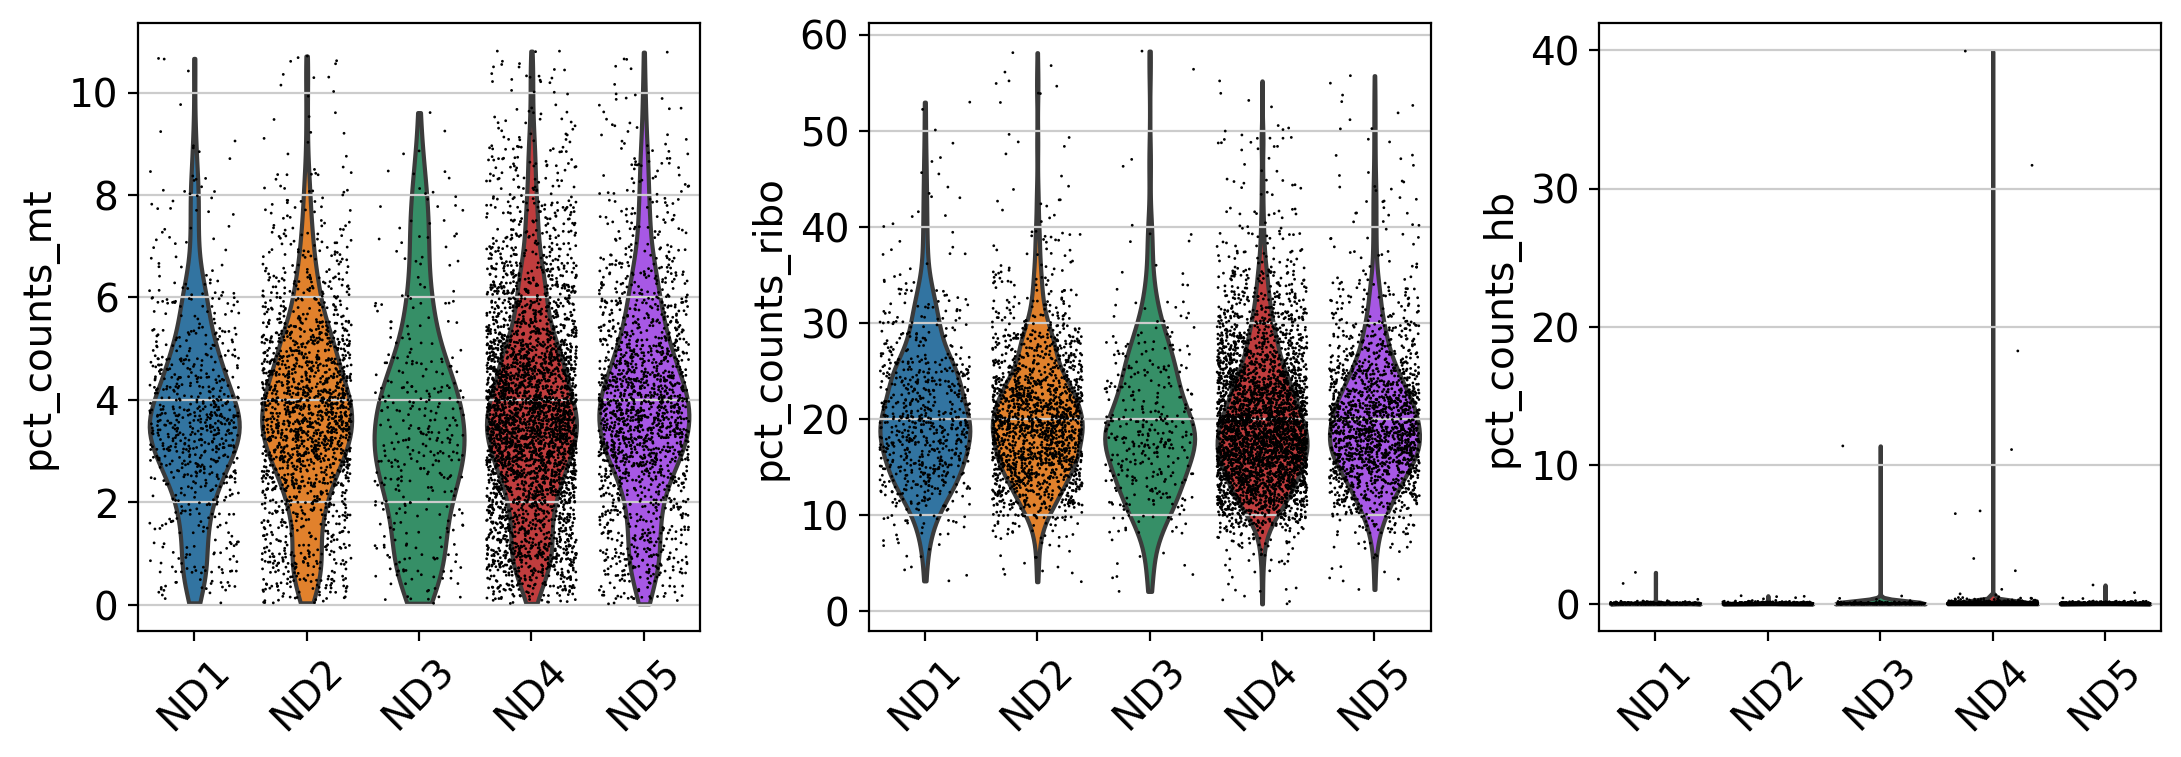

In [87]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

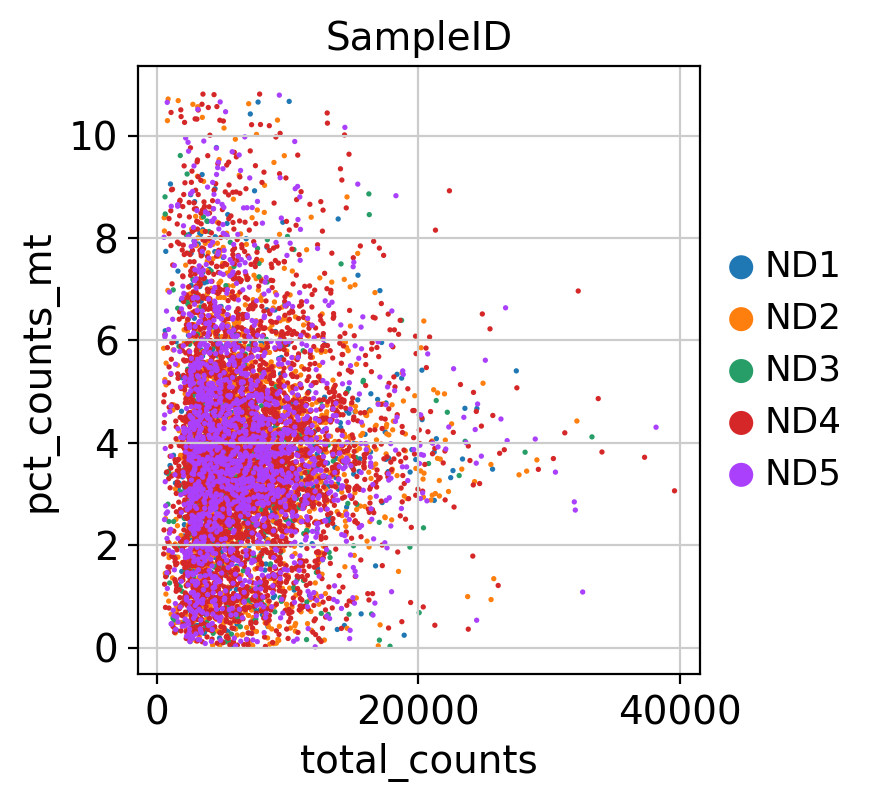

In [88]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="SampleID")

# Filtering

In [89]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

8155 18862


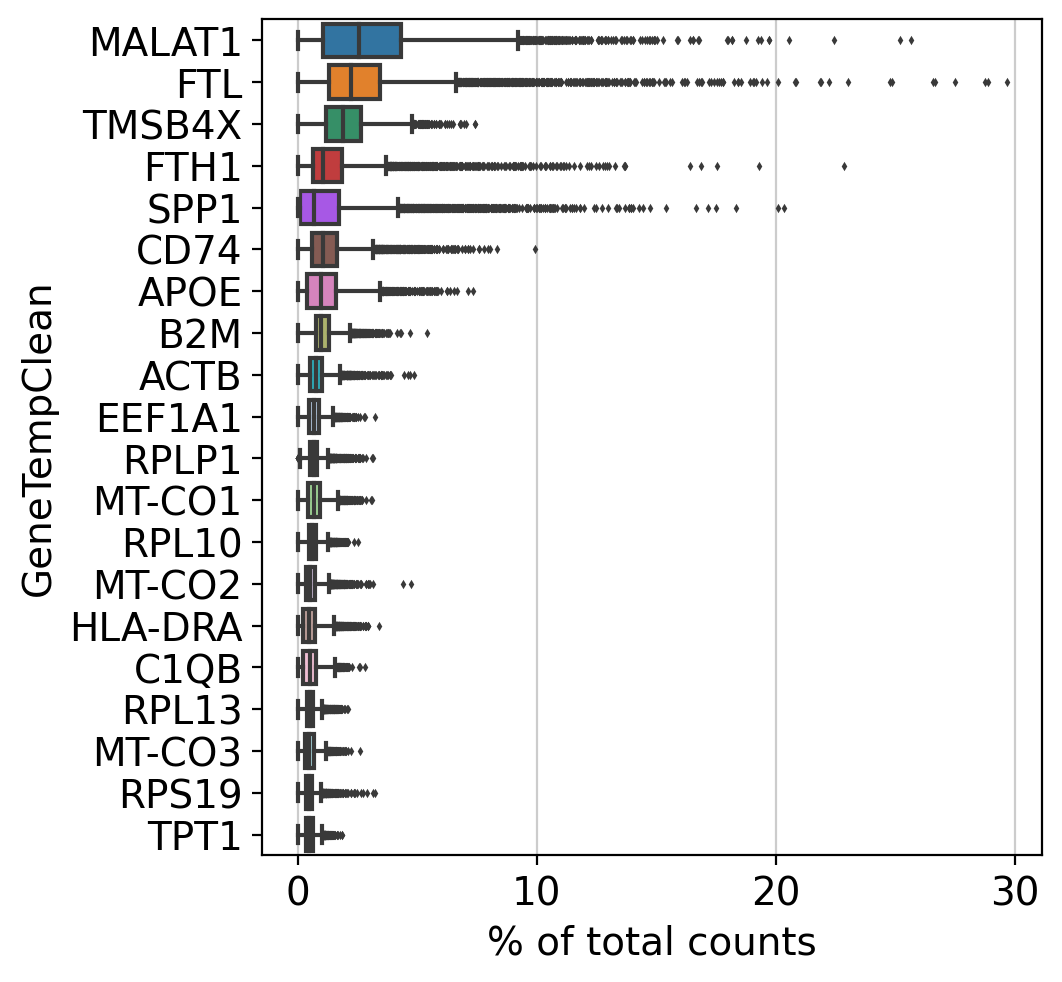

In [90]:
sc.pl.highest_expr_genes(adata, n_top=20)

# Mito/Ribo filtering

In [91]:
adata = adata[adata.obs['pct_counts_mt'] < 10, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 2, :]
adata = adata[adata.obs['pct_counts_hb'] < 2, :]
print("Remaining cells %d"%adata.n_obs)

Remaining cells 8100


# Plot filtered QC

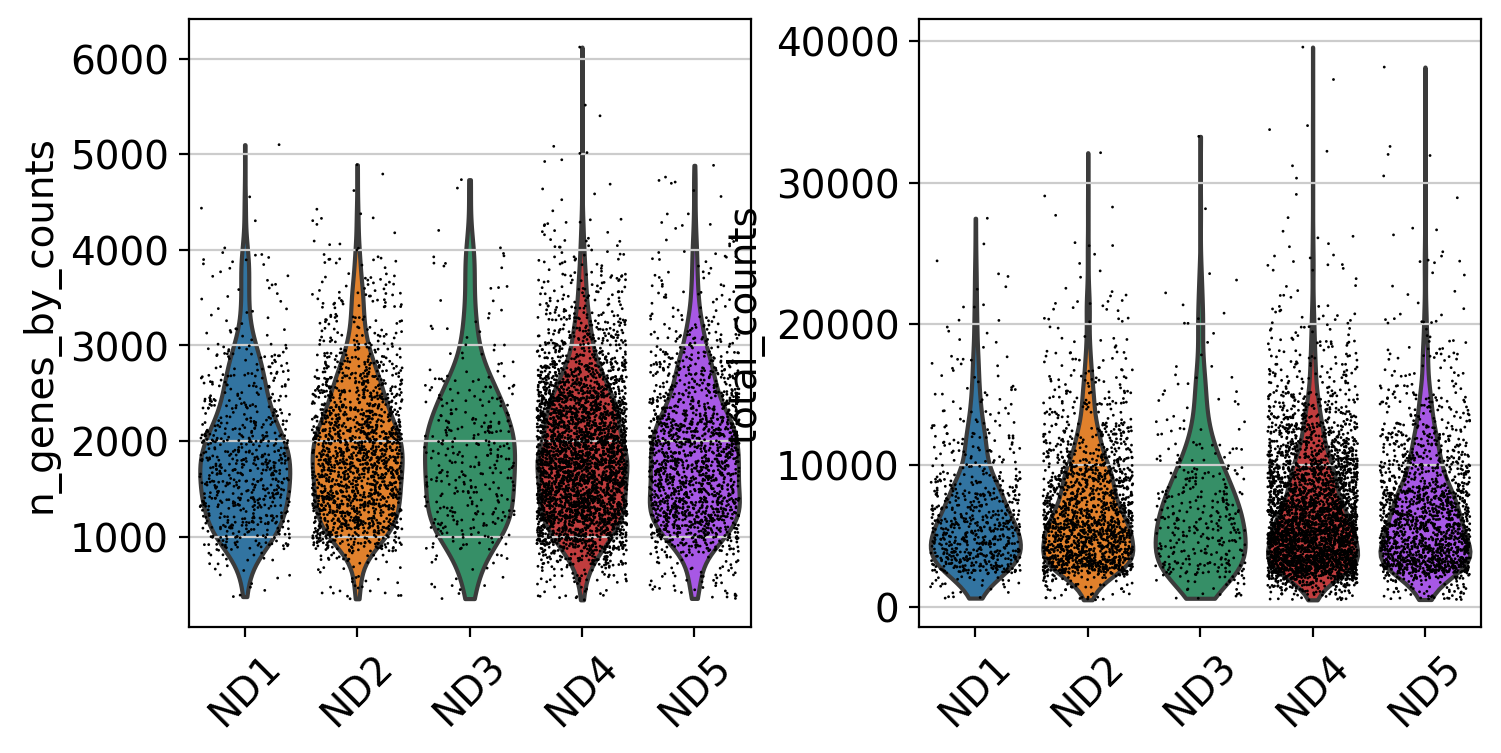

In [92]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

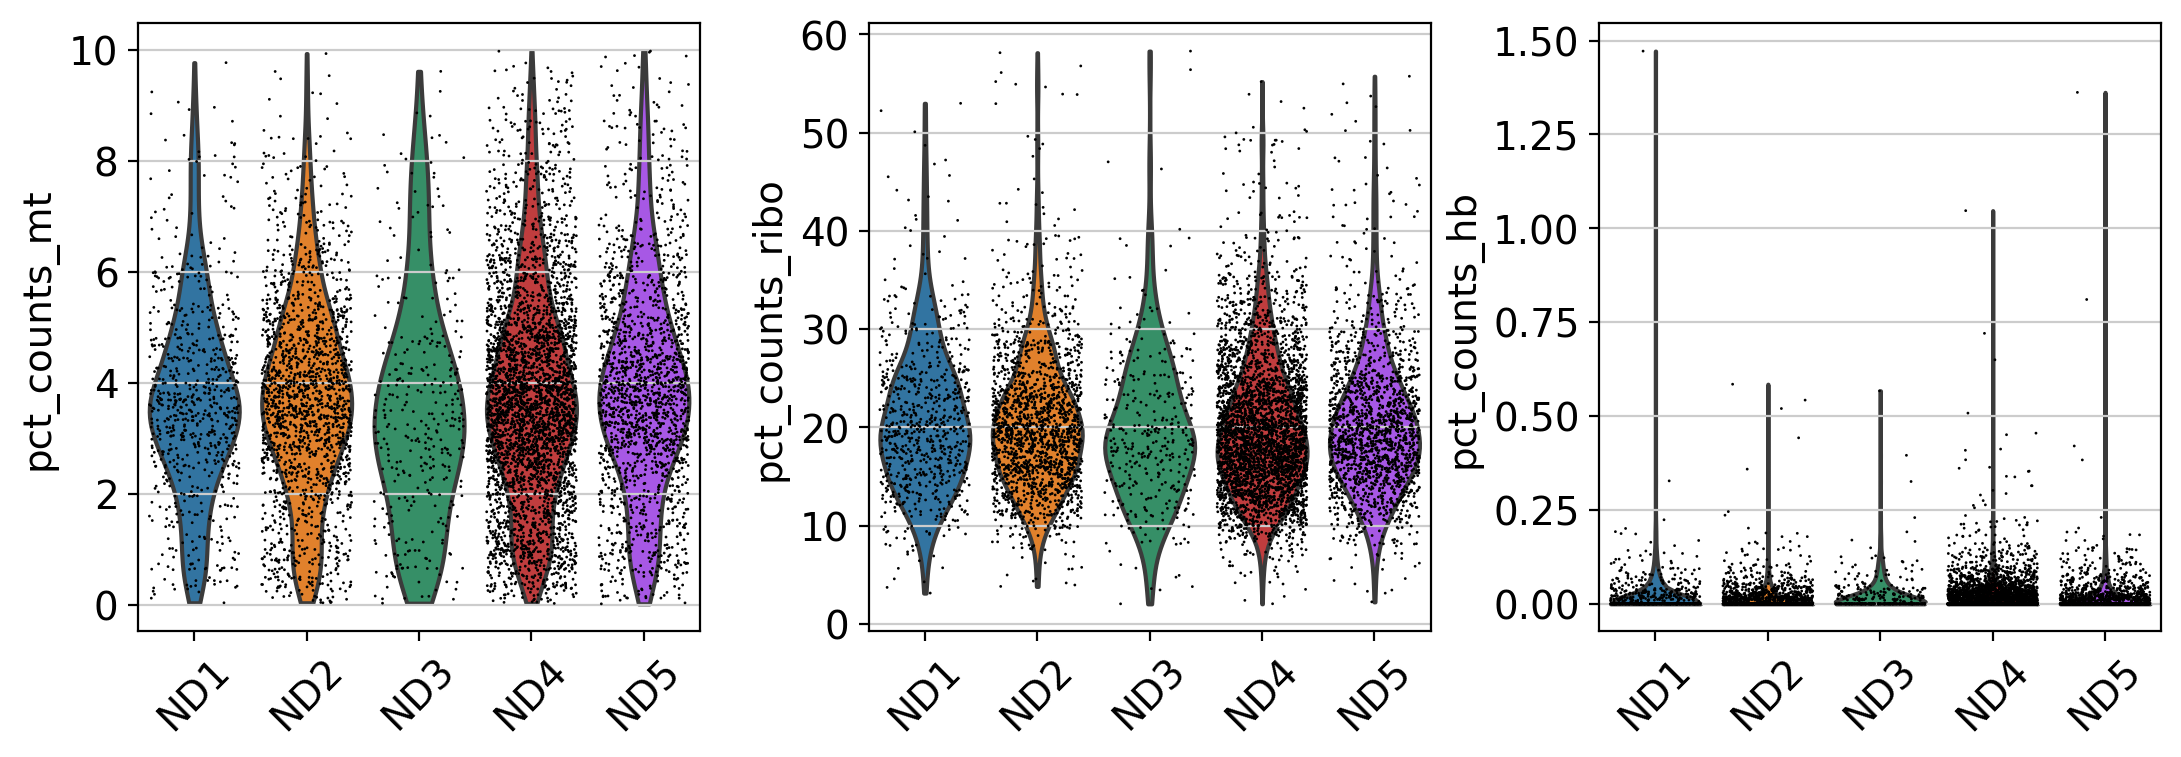

In [93]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

# Filter genes

In [94]:
mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")

In [95]:
mito_gene_indicator = np.in1d(adata.var_names, mito_gene_names)

In [96]:
adata = adata[:, ~mito_gene_indicator]

In [97]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(ribo_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

8100 18849
8100 18745


# Calculate cell-cycle scores

In [98]:
cell_cycle_genes = [x.strip() for x in open('/home/lugli/spuccio/Projects/SP035_TregIntegration/Analysis/regev_lab_cell_cycle_genes_homo.txt')]
print(len(cell_cycle_genes))
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

90
89


In [99]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

... storing 'phase' as categorical


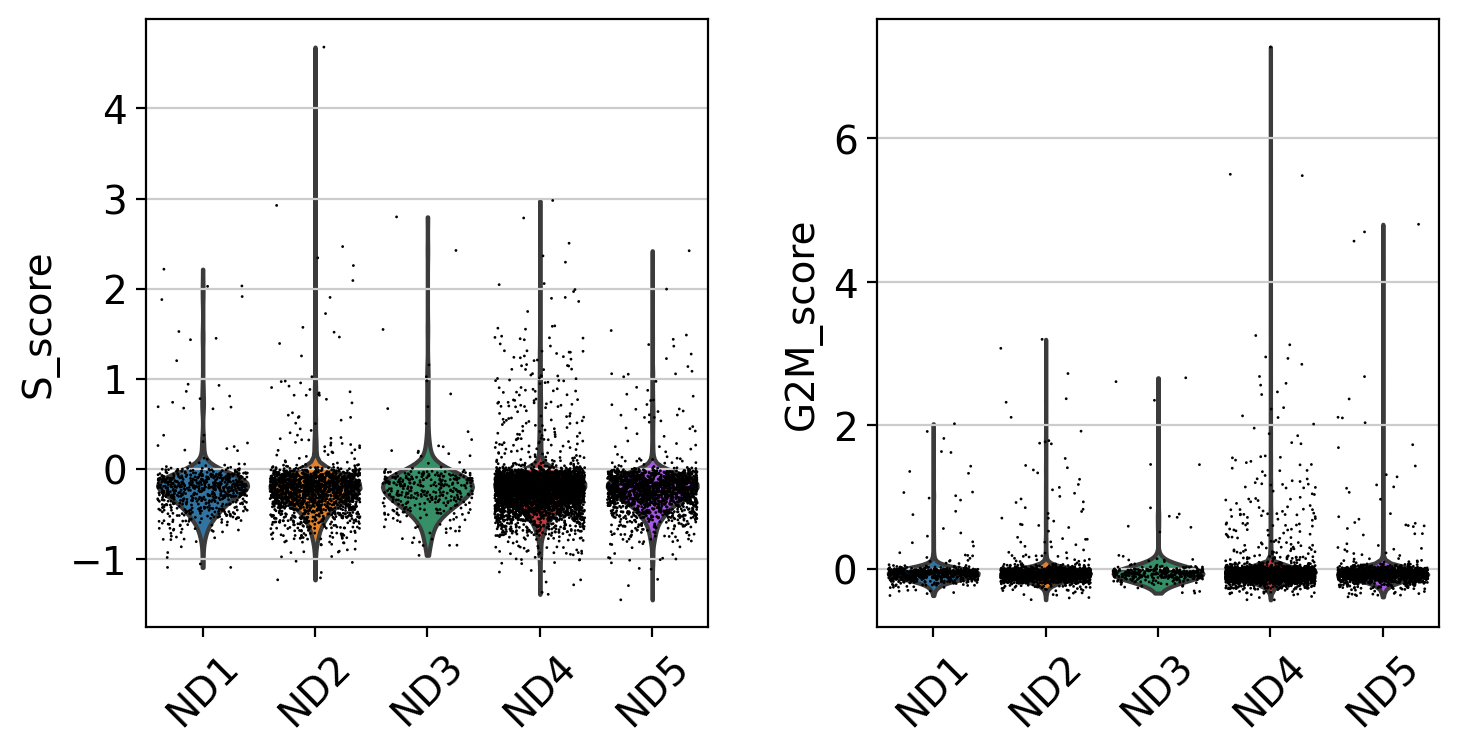

In [100]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'SampleID', rotation=45)

# Predict doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 13.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.4%
Elapsed time: 6.3 seconds


4

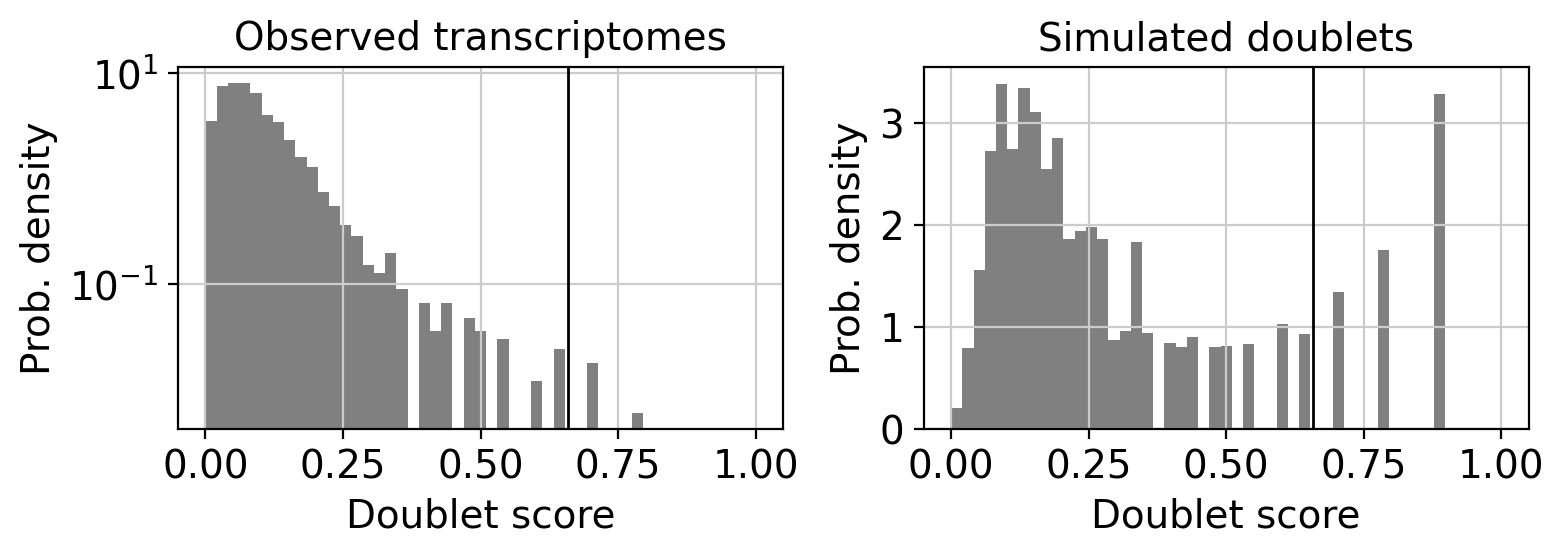

In [101]:
scrub = scr.Scrublet(adata.layers['raw'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [102]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


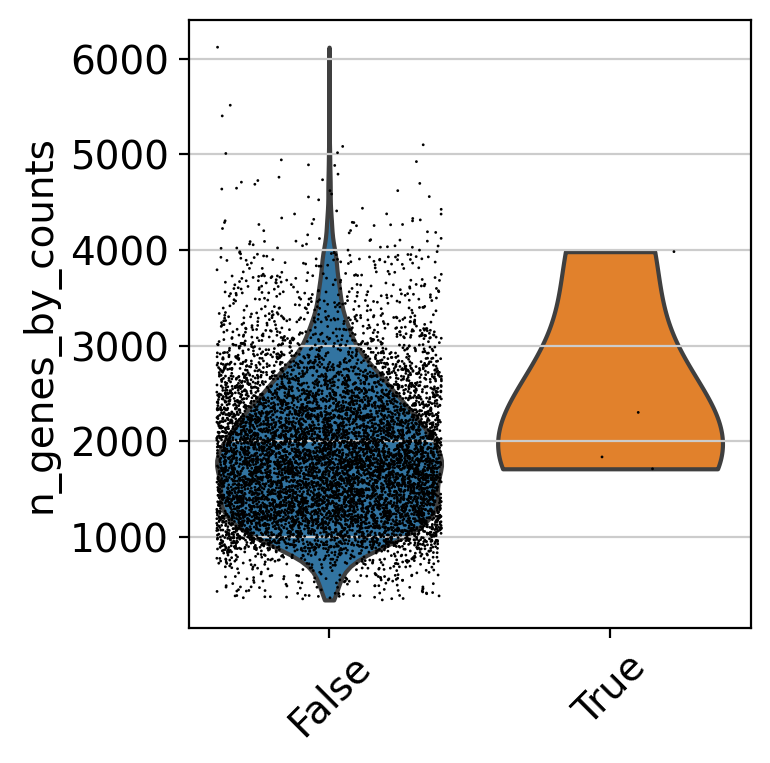

In [103]:
sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [104]:
adata = adata[adata.obs['doublet_info'] == "False",:]

# Processing 

In [105]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.layers['cpm'] = adata.X
# logaritmize
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Filter higly variable genes
#adata.raw = adata

# scale
#sc.pp.scale(adata)

# Celltypist classification

In [106]:
sc.tl.pca(adata,svd_solver='arpack',copy=False)

In [107]:
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=40)

In [108]:
sce.pp.harmony_integrate(adata, ['SampleID'])

2022-06-16 15:00:18,929 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2022-06-16 15:00:20,182 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2022-06-16 15:00:21,431 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2022-06-16 15:00:22,292 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2022-06-16 15:00:22,712 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2022-06-16 15:00:23,135 - harmonypy - INFO - Iteration 6 of 10
Iteration 6 of 10
2022-06-16 15:00:23,557 - harmonypy - INFO - Iteration 7 of 10
Iteration 7 of 10
2022-06-16 15:00:23,992 - harmonypy - INFO - Iteration 8 of 10
Iteration 8 of 10
2022-06-16 15:00:24,413 - harmonypy - INFO - Converged after 8 iterations
Converged after 8 iterations


In [109]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [110]:
sc.tl.umap(adata)

In [111]:
adata.obsm['X_umap_harmony'] = adata.obsm['X_umap']

In [112]:
adata

AnnData object with n_obs × n_vars = 8096 × 18745
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 'distances', 'connectivities'

In [113]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 14
📂 Storing models in /home/lugli/spuccio/.celltypist/data/models
💾 Downloading model [1/14]: Immune_All_Low.pkl
💾 Downloading model [2/14]: Immune_All_High.pkl
💾 Downloading model [3/14]: Immune_All_PIP.pkl
💾 Downloading model [4/14]: Immune_All_AddPIP.pkl
💾 Downloading model [5/14]: Adult_Mouse_Gut.pkl
💾 Downloading model [6/14]: COVID19_Immune_Landscape.pkl
💾 Downloading model [7/14]: Cells_Fetal_Lung.pkl
💾 Downloading model [8/14]: Cells_Intestinal_Tract.pkl
💾 Downloading model [9/14]: Cells_Lung_Airway.pkl
💾 Downloading model [10/14]: Developing_Mouse_Brain.pkl
💾 Downloading model [11/14]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [12/14]: Human_Lung_Atlas.pkl
💾 Downloading model [13/14]: Nuclei_Lung_Airway.pkl
💾 Downloading model [14/14]: Pan_Fetal_Human.pkl


In [114]:
model = models.Model.load(model = 'Immune_All_High.pkl')

In [115]:
predictionsHigh = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

🔬 Input data has 8096 cells and 18745 genes
🔗 Matching reference genes in the model
🧬 2524 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [116]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_C_PMID33782623_GSE163120.h5ad")

In [117]:
predictionsHigh.to_adata()

AnnData object with n_obs × n_vars = 8096 × 18745
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'

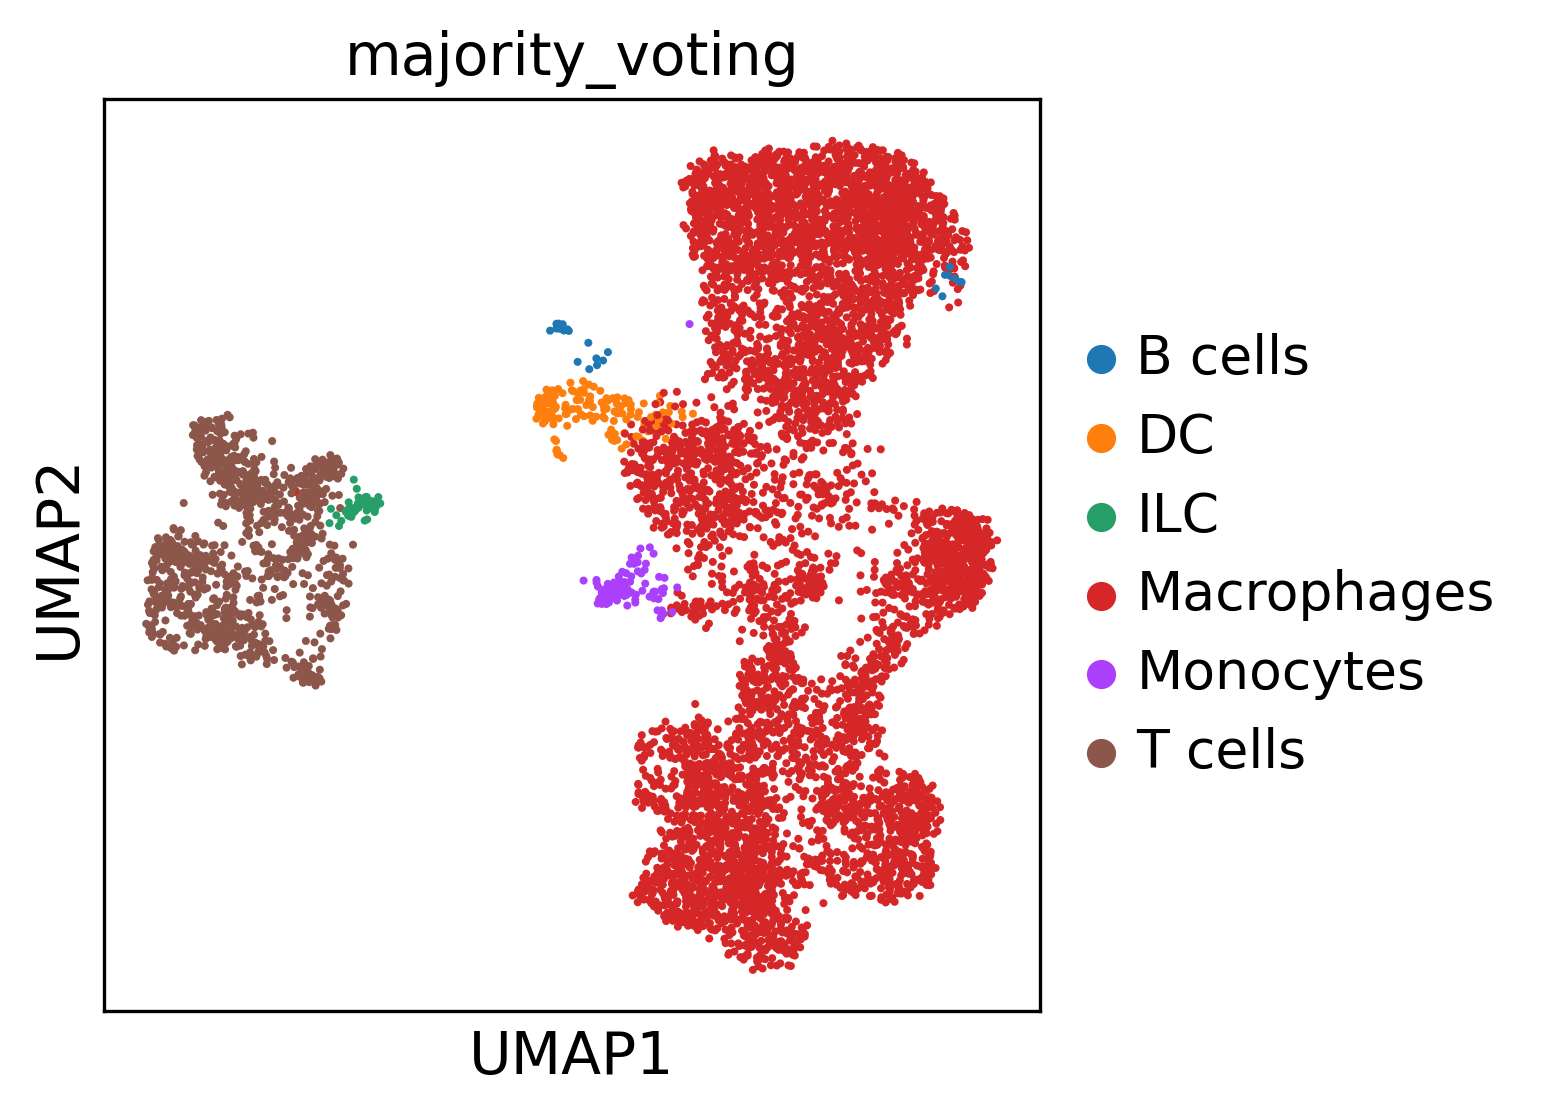

In [118]:
sc.set_figure_params(dpi=150)
sc.pl.umap(predictionsHigh.to_adata(), color='majority_voting')

# PanglaoDB classification

In [119]:
adata = adata[:, adata.var.highly_variable]

In [120]:
markers = dc.get_resource('PanglaoDB')
markers

label genesymbol canonical_marker         cell_type germ_layer human  \
0          CTRB1            False       Enterocytes   Endoderm  True   
1          CTRB1             True      Acinar cells   Endoderm  True   
2           KLK1             True      Acinar cells   Endoderm  True   
3           KLK1            False      Goblet cells   Endoderm  True   
4           KLK1            False  Epithelial cells   Mesoderm  True   
...          ...              ...               ...        ...   ...   
8472     SLC14A1             True  Urothelial cells   Mesoderm  True   
8473       UPK3A             True  Urothelial cells   Mesoderm  True   
8474       UPK1A             True  Urothelial cells   Mesoderm  True   
8475        UPK2             True  Urothelial cells   Mesoderm  True   
8476       UPK3B             True  Urothelial cells   Mesoderm  True   

label human_sensitivity human_specificity mouse mouse_sensitivity  \
0                   0.0        0.00439422  True        0.00331126   
1                   1.0       0.000628931  True          0.957143   
2              0.833333        0.00503145  True          0.314286   
3              0.588235        0.00503937  True          0.903226   
4                   0.0        0.00823306  True          0.225806   
...                 ...               ...   ...               ...   
8472                0.0         0.0181704  True               0.0   
8473                0.0               0.0  True               0.0   
8474                0.0               0.0  True               0.0   
8475                0.0               0.0  True               0.0   
8476                0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
0             0.0204803        9606         GI tract           0.017  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
3             0.0124084        9606         GI tract           0.013  
4             0.0137585        9606       Epithelium           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[8477 rows x 13 columns]

In [121]:
markers['organ'].value_counts()

Immune system         1775
Brain                 1589
GI tract               540
Kidney                 450
Reproductive           429
Connective tissue      413
Vasculature            372
Pancreas               365
Liver                  310
Epithelium             258
Blood                  247
Bone                   215
Lungs                  210
Skin                   172
Skeletal muscle        168
Olfactory system       136
Heart                  131
Smooth muscle          130
Eye                    122
Mammary gland           94
Zygote                  85
Embryo                  56
Placenta                28
Thymus                  27
Adrenal glands          25
Oral cavity             18
Thyroid                 14
Urinary bladder         11
Parathyroid glands      10
Name: organ, dtype: int64

In [122]:
# Filter by canonical_marker and human
markers = markers[(markers['human']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label genesymbol canonical_marker                     cell_type germ_layer  \
1          CTRB1             True                  Acinar cells   Endoderm   
2           KLK1             True                  Acinar cells   Endoderm   
5           KLK1             True               Principal cells   Mesoderm   
7           KLK1             True  Plasmacytoid dendritic cells   Mesoderm   
8           KLK1             True             Endothelial cells   Mesoderm   
...          ...              ...                           ...        ...   
8472     SLC14A1             True              Urothelial cells   Mesoderm   
8473       UPK3A             True              Urothelial cells   Mesoderm   
8474       UPK1A             True              Urothelial cells   Mesoderm   
8475        UPK2             True              Urothelial cells   Mesoderm   
8476       UPK3B             True              Urothelial cells   Mesoderm   

label human human_sensitivity human_specificity mouse mouse_sensitivity  \
1      True               1.0       0.000628931  True          0.957143   
2      True          0.833333        0.00503145  True          0.314286   
5      True               0.0        0.00814536  True          0.285714   
7      True               0.0        0.00820189  True               1.0   
8      True               0.0        0.00841969  True               0.0   
...     ...               ...               ...   ...               ...   
8472   True               0.0         0.0181704  True               0.0   
8473   True               0.0               0.0  True               0.0   
8474   True               0.0               0.0  True               0.0   
8475   True               0.0               0.0  True               0.0   
8476   True               0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
5             0.0140583        9606           Kidney           0.013  
7             0.0129136        9606    Immune system           0.013  
8             0.0149153        9606      Vasculature           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[5180 rows x 13 columns]

In [123]:
# Run leiden clustering algorithm
sc.tl.leiden(adata)

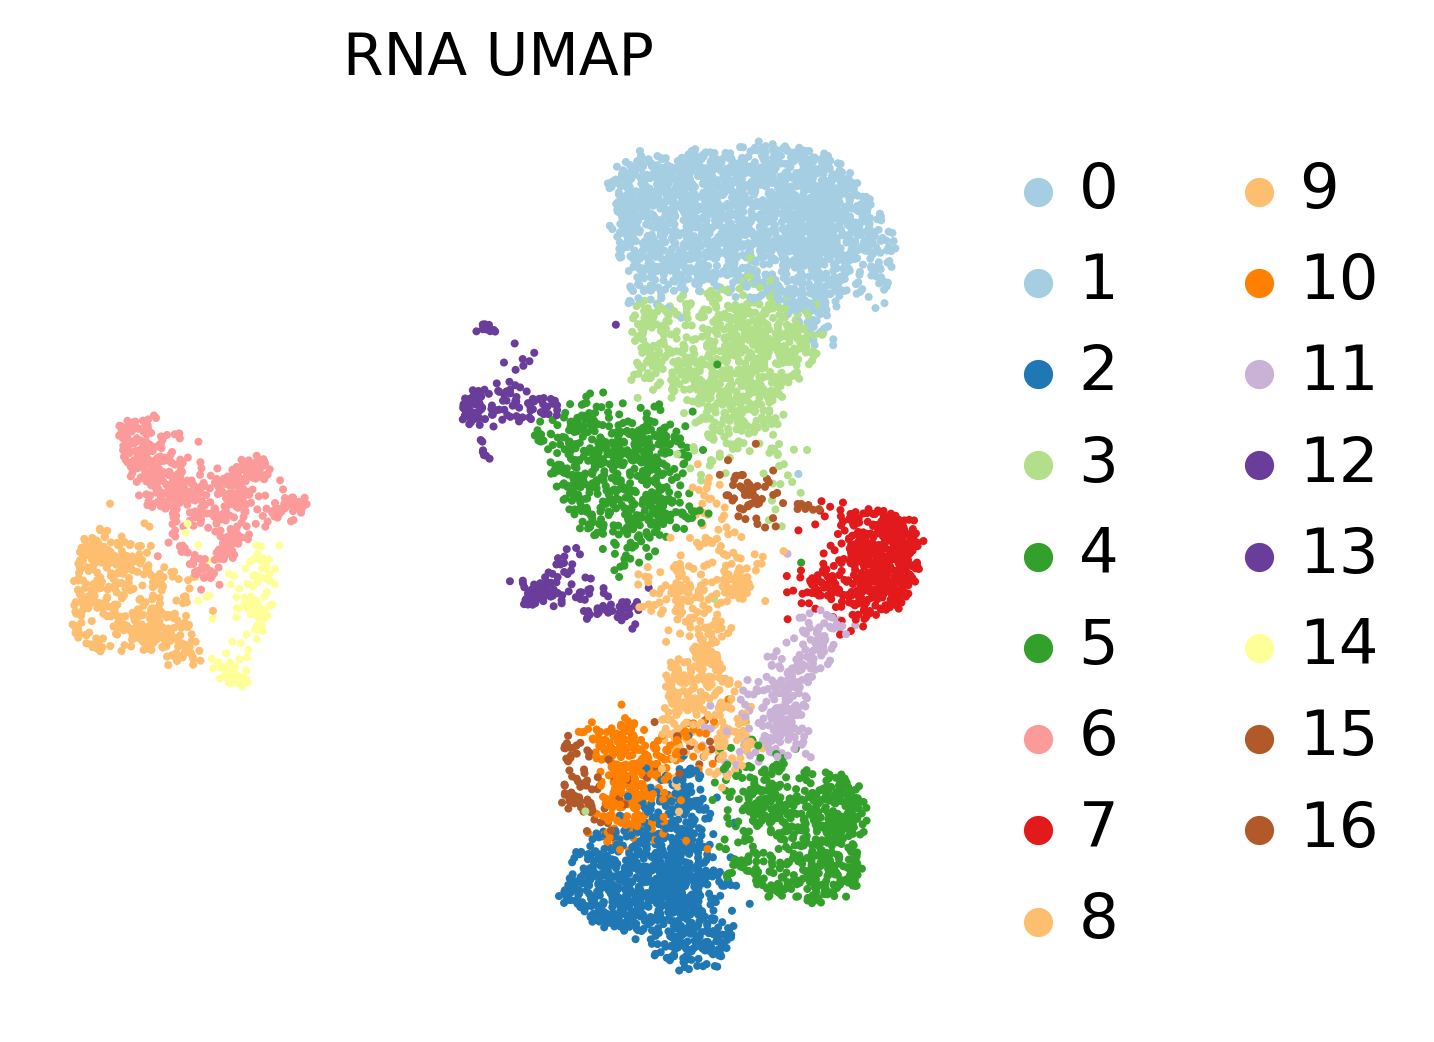

In [124]:
# Visualize
sc.pl.umap(adata, color='leiden', title='RNA UMAP',palette='Paired',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [125]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 8096 samples and 1950 targets for 94 sources.


100%|██████████| 8096/8096 [00:02<00:00, 3364.77it/s]


In [126]:
adata.obsm['ora_estimate']

source    Acinar cells  Adipocytes  Alpha cells  Alveolar macrophages  \
ND1-0         1.363974    2.461562    -0.000000              1.834791   
ND1-1         5.027773    2.461562     1.834791              1.834791   
ND1-2         1.363974    2.461562     1.834791             -0.000000   
ND1-3        -0.000000    1.072346    -0.000000              1.834791   
ND1-4         1.363974    4.054286    -0.000000             -0.000000   
...                ...         ...          ...                   ...   
ND5-1714      1.363974    4.054286     1.834791              1.834791   
ND5-1715      3.077472    2.461562    -0.000000              1.834791   
ND5-1716      1.363974    2.461562     1.834791             -0.000000   
ND5-1717     -0.000000    2.461562     1.834791              1.834791   
ND5-1718     -0.000000    1.072346     1.834791              1.834791   

source    Astrocytes   B cells  B cells memory  B cells naive  Basophils  \
ND1-0       1.072346 -0.000000        0.890829       0.890829   2.747231   
ND1-1       4.054286  2.328184       -0.000000       0.890829  -0.000000   
ND1-2       2.461562 -0.000000        2.082577       0.890829   2.747231   
ND1-3       1.072346  1.008519        0.890829       0.890829   2.747231   
ND1-4       1.072346  1.008519        0.890829       0.890829   1.208460   
...              ...       ...             ...            ...        ...   
ND5-1714    4.054286  1.008519       -0.000000       0.890829   2.747231   
ND5-1715    2.461562  1.008519       -0.000000      -0.000000   1.208460   
ND5-1716    2.461562  1.008519       -0.000000      -0.000000   1.208460   
ND5-1717    1.072346 -0.000000        0.890829       0.890829   2.747231   
ND5-1718    2.461562  1.008519       -0.000000      -0.000000  -0.000000   

source    Bergmann glia  ...  Schwann cells  Sebocytes  Sertoli cells  \
ND1-0          1.278919  ...       2.818395       -0.0      -0.000000   
ND1-1          1.278919  ...      -0.000000       -0.0       3.308777   
ND1-2         -0.000000  ...       1.242177       -0.0       3.308777   
ND1-3         -0.000000  ...      -0.000000       -0.0       1.471021   
ND1-4          1.278919  ...      -0.000000       -0.0       1.471021   
...                 ...  ...            ...        ...            ...   
ND5-1714       1.278919  ...      -0.000000       -0.0       1.471021   
ND5-1715       2.896188  ...       2.818395       -0.0       1.471021   
ND5-1716       2.896188  ...       1.242177       -0.0       1.471021   
ND5-1717      -0.000000  ...       1.242177       -0.0       1.471021   
ND5-1718       1.278919  ...      -0.000000       -0.0       1.471021   

source    Smooth muscle cells   T cells  T helper cells  T regulatory cells  \
ND1-0                1.208460  2.973686        -0.00000                -0.0   
ND1-1               -0.000000  4.320933         1.20846                -0.0   
ND1-2                1.208460  0.738559        -0.00000                -0.0   
ND1-3                1.208460  1.764139        -0.00000                -0.0   
ND1-4                1.208460 -0.000000         1.20846                -0.0   
...                       ...       ...             ...                 ...   
ND5-1714             1.208460  1.764139        -0.00000                -0.0   
ND5-1715             2.747231  1.764139         1.20846                -0.0   
ND5-1716            -0.000000  0.738559         1.20846                -0.0   
ND5-1717             1.208460  2.973686        -0.00000                -0.0   
ND5-1718            -0.000000  1.764139         1.20846                -0.0   

source    Tanycytes  Thymocytes  Tuft cells  
ND1-0     -0.000000    1.242177   -0.000000  
ND1-1     -0.000000    1.242177    1.536917  
ND1-2      1.615047    1.242177    3.453515  
ND1-3     -0.000000    1.242177    1.536917  
ND1-4     -0.000000   -0.000000    3.453515  
...             ...         ...         ...  
ND5-1714   1.615047   -0.000000    3.453515  
ND5-1715   1.615

In [127]:
adata.obsm['ora_estimate'].columns

Index(['Acinar cells', 'Adipocytes', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive', 'Basophils',
       'Bergmann glia', 'Beta cells', 'Cardiomyocytes', 'Cholangiocytes',
       'Chondrocytes', 'Delta cells', 'Dendritic cells', 'Ductal cells',
       'Embryonic stem cells', 'Endothelial cells', 'Enterocytes',
       'Enteroendocrine cells', 'Eosinophils', 'Ependymal cells',
       'Epiblast cells', 'Epithelial cells', 'Epsilon cells', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma (PP) cells', 'Gamma delta T cells', 'Gastric chief cells',
       'Germ cells', 'Glomus cells', 'Hematopoietic stem cells',
       'Hepatic stellate cells', 'Hepatocytes', 'Immature neurons',
       'Interneurons', 'Keratinocytes', 'Kupffer cells', 'Langerhans cells',
       'Leydig cells', 'Loop of Henle cells', 'Luminal epithelial cells',
       'Macrophages', 'Mammary epithelial cells', 'Mast ce

In [128]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 8096 × 94
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'ora_estimate', 'ora_pvals'

In [129]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
mean_enr

B cells  B cells memory  B cells naive  Chondrocytes  Dendritic cells  \
0   1.019381        0.836780       1.013114      1.677707         4.589587   
1   1.116266        0.978316       1.154370      2.256667         6.033203   
10  0.850095        0.405090       0.553205      1.828755         7.229385   
11  0.312129        0.345033       0.445680      2.007907         5.837118   
12  4.345278        4.153911       4.893675      1.353433        12.375298   
13  2.311116        0.366409       1.428569      4.519505        11.275540   
14  2.374061        1.183795       1.583750      0.524530         3.372905   
15  0.570729        0.259444       0.372215      1.942413         6.865394   
16  0.444274        0.381209       0.557953      3.773746         7.203117   
2   1.010618        0.449258       0.517577      1.865958         7.668934   
3   0.980054        0.746993       0.955697      3.873101         7.808501   
4   0.644398        0.606932       0.663098      2.715052         8.959105   
5   1.267932        0.533029       0.927134      3.013675        10.109528   
6   3.250569        2.606057       3.181723      0.956308         3.592647   
7   0.272703        0.328164       0.437125      3.329795         6.915679   
8   0.889211        0.448310       0.653068      2.663728         8.118606   
9   2.658229        2.015161       2.467029      0.894687         2.557292   

    Endothelial cells  Enterocytes  Fibroblasts  Gamma delta T cells  \
0            2.154278     2.501478     3.142627             2.532010   
1            2.581841     2.206964     6.605550             1.862531   
10           5.141170     2.820913     4.821791             1.897734   
11           3.766647     2.905085     3.081366             2.726704   
12           2.744543     1.783824     4.455819             2.797656   
13           4.591139     3.517682     9.381660             1.144113   
14           1.554022     0.201100     2.477865            19.905106   
15           3.879435     2.309166     7.341215             8.508408   
16           2.562494     2.020474     3.645857            12.378616   
2            4.718469     2.395204     9.741961             0.999800   
3            3.133402     2.732938     5.639241             2.270179   
4            3.540010     2.357519    10.104417             1.193577   
5            4.509417     4.074956     6.678954             2.169653   
6            2.243639     0.708299     2.940665             9.270775   
7            3.301363     2.416657     1.386144             2.925338   
8            5.207669     3.432671     6.628395             1.456363   
9            2.314040     0.427114     3.409492             5.956425   

    Kupffer cells  Macrophages  Microglia  Monocytes   NK cells  Neutrophils  \
0        2.494467     3.759157   7.331981   4.258876   2.270359     2.685879   
1        2.917826     6.130731   8.245844   4.129189   2.483675     4.098287   
10       3.967399     5.328273   3.255128   8.901992   2.104835     3.907852   
11       3.459824     6.130230   4.896112   4.900604   1.865744     2.611792   
12       1.570219     4.877461   3.691863   5.798535   3.968193     4.413168   
13       3.687656     7.822206   7.230301  11.970961   2.486939    12.971984   
14       0.451171     3.646681   0.576810   3.763953  18.761299     1.102875   
15       3.143831     4.712463   3.157011   6.589554   1.992924     4.362694   
16       3.275537     5.140051   6.295868   6.006465   2.076769     5.253867   
2        3.575773     5.762590   3.817919   7.359943   2.277821     4.665049   
3        4.333375     7.066370   8.586368   8.163222   2.364511     5.972089   
4        3.340973     8.695999   6.670220   5.070786   2.090639     5.558413   
5        5.404158    10.363488   7.022161   7.764580   2.731467     7.023667   
6        0.481528     4.091555   0.924437   5.418340  21.092916     1.621497   
7        5.434946     7.347072   5.514111   6.793430   1.829425     3.619210   
8        2.849653     7

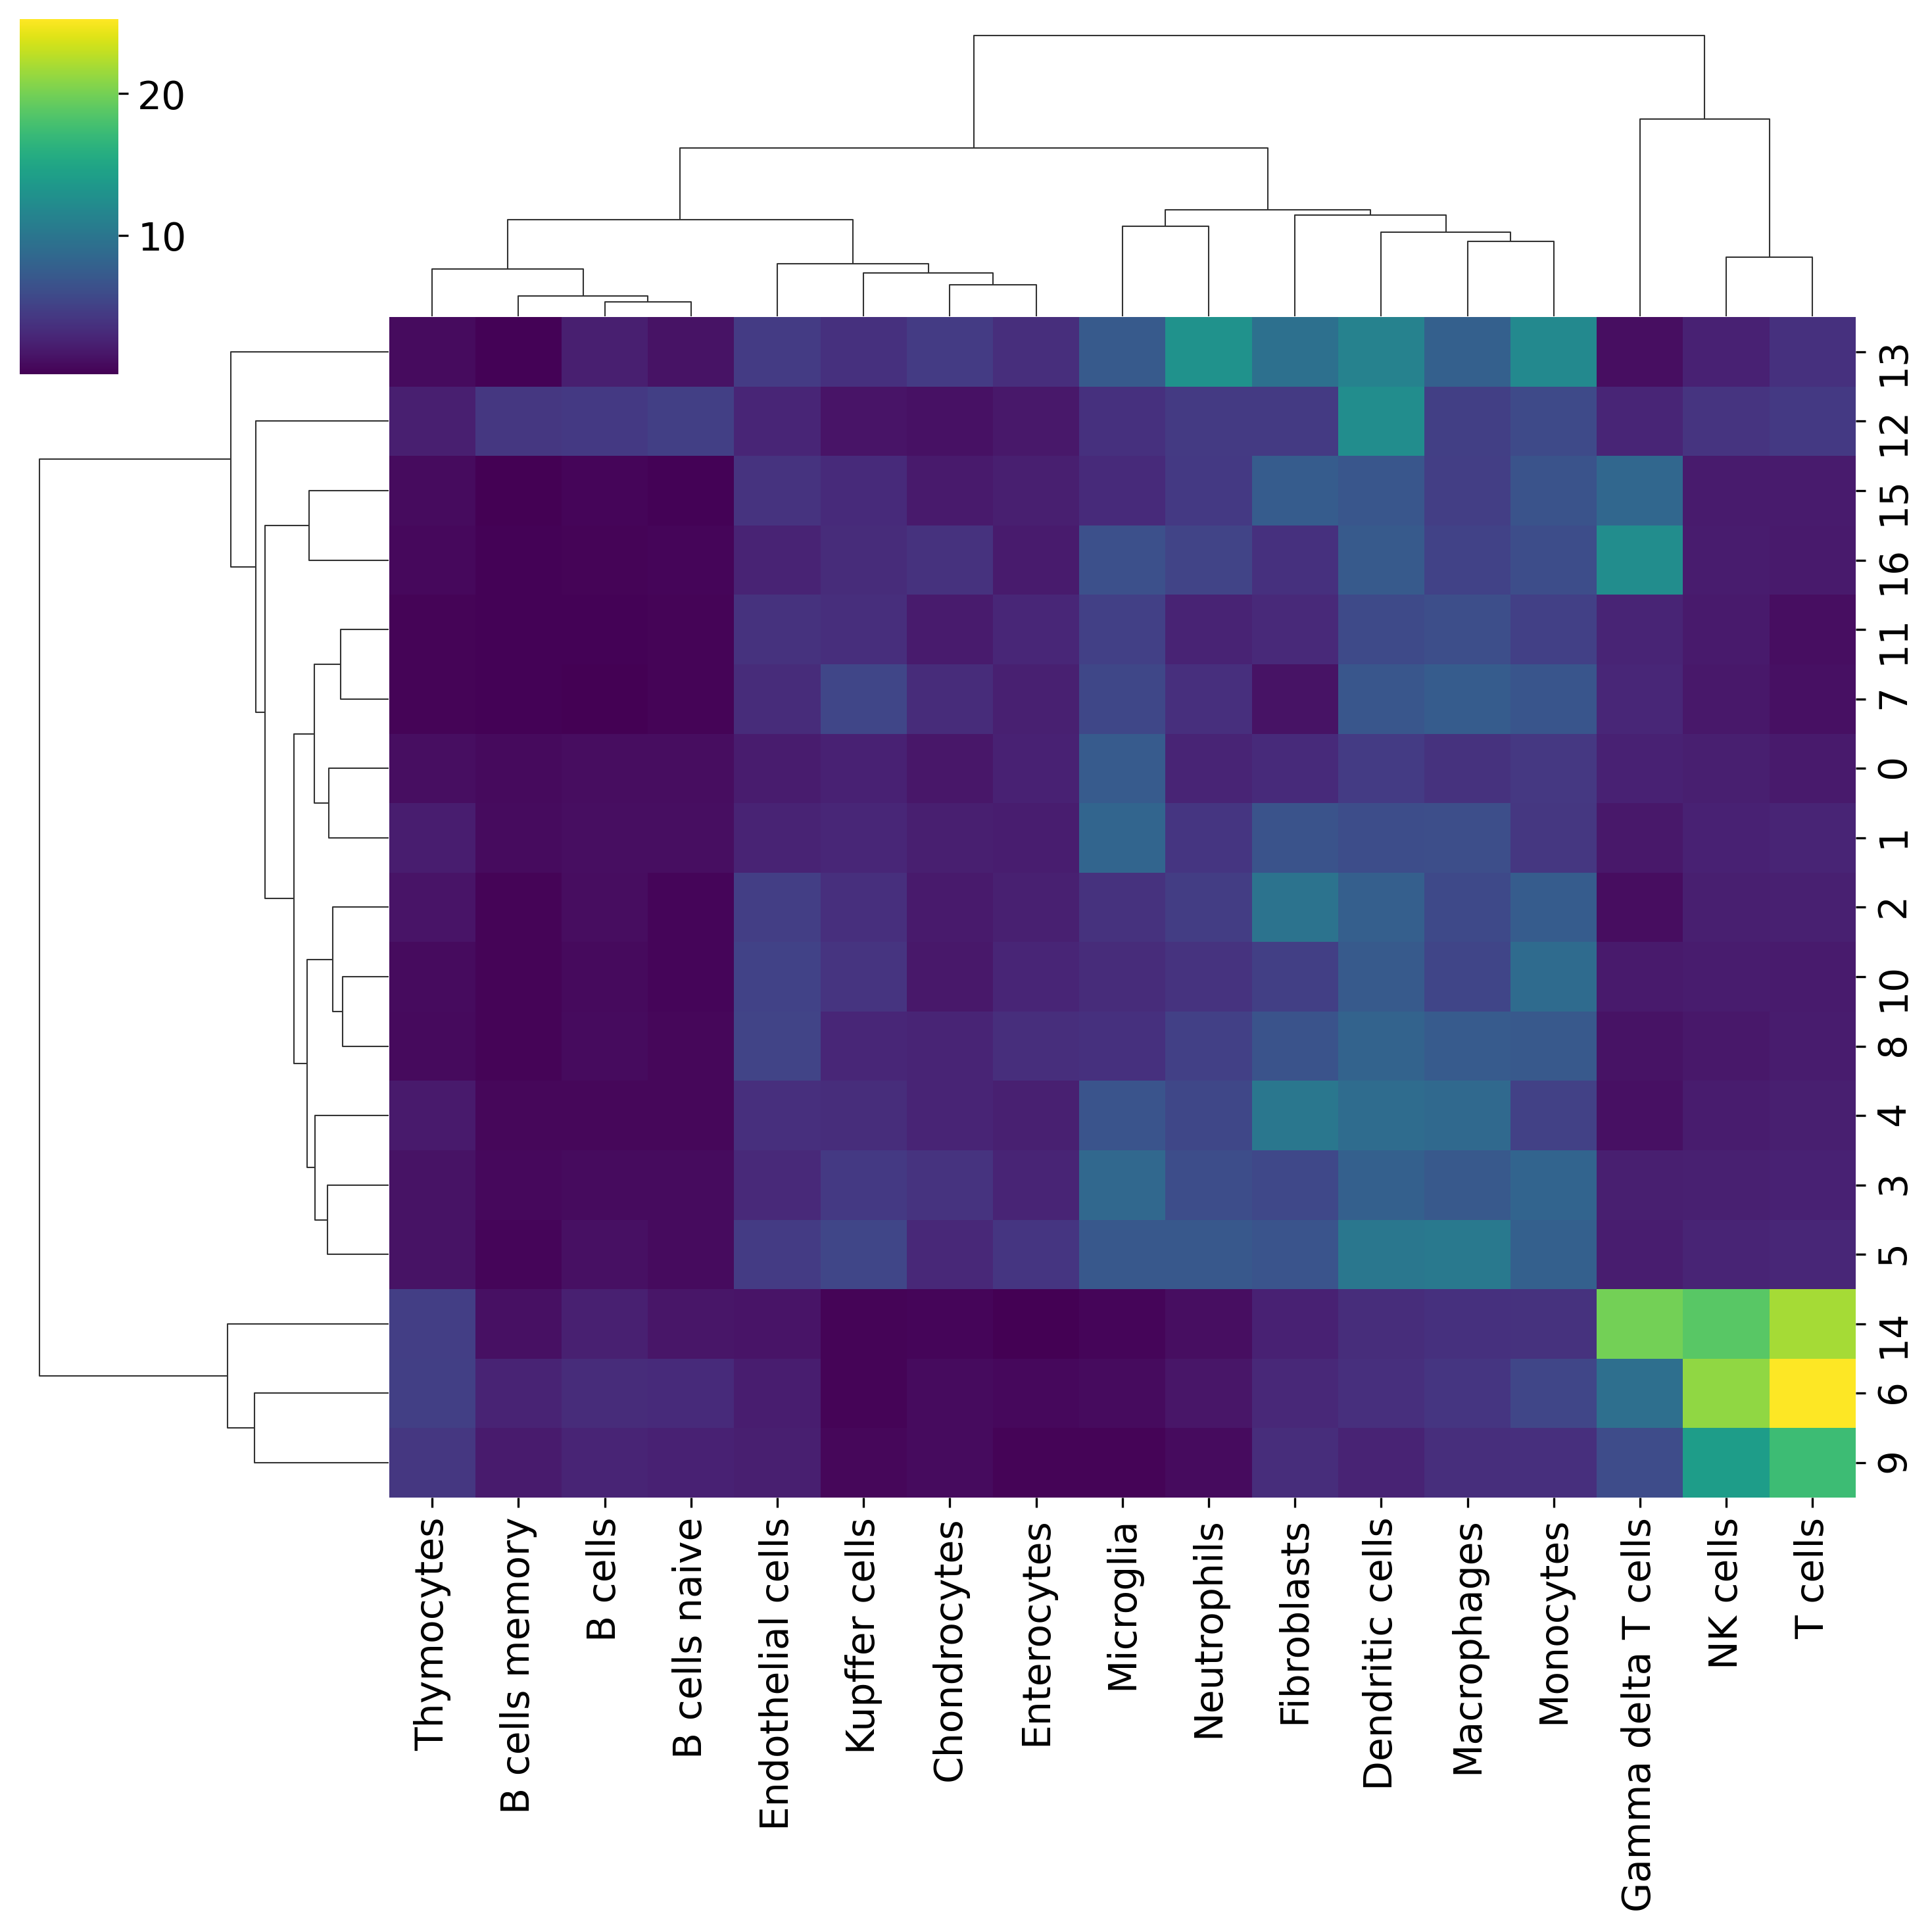

In [130]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [131]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'Microglia',
 '1': 'Microglia',
 '10': 'Monocytes',
 '11': 'Macrophages',
 '12': 'Dendritic cells',
 '13': 'Neutrophils',
 '14': 'T cells',
 '15': 'Gamma delta T cells',
 '16': 'Gamma delta T cells',
 '2': 'Fibroblasts',
 '3': 'Microglia',
 '4': 'Fibroblasts',
 '5': 'Macrophages',
 '6': 'T cells',
 '7': 'Macrophages',
 '8': 'Dendritic cells',
 '9': 'T cells'}

... storing 'cell_type' as categorical


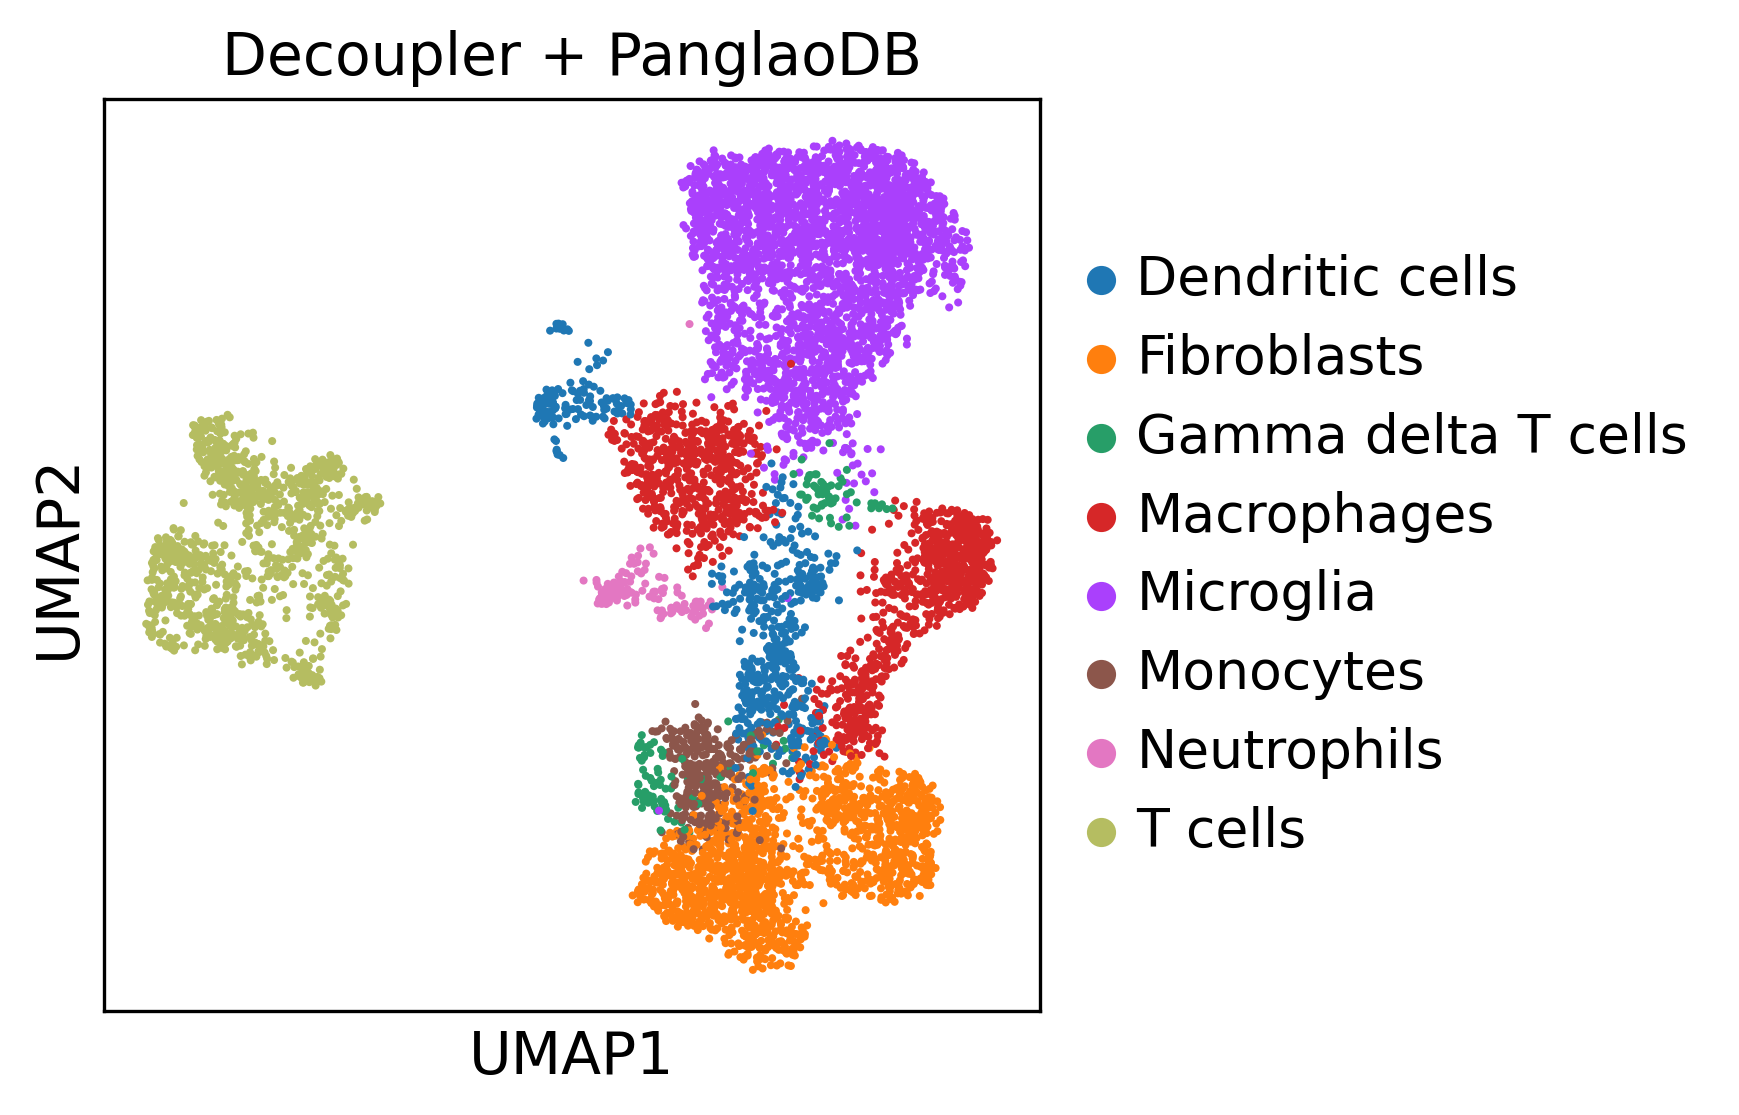

In [132]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type',title='Decoupler + PanglaoDB')

In [133]:
adata

AnnData object with n_obs × n_vars = 8096 × 1950
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden', 'cell_type'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca_h

In [134]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_C_PMID33782623_GSE163120.h5ad")